# OkCupid - Astrological Sign Prediction

by Juan Daniel Ochoa Hernández. July 21st, 2023

This project delves into data sourced from the online dating app OKCupid. In recent times, the utilization of dating apps to discover meaningful relationships has seen a significant upsurge. Many of these platforms employ sophisticated data science techniques to offer user recommendations for potential matches and to enhance the overall user journey. These apps grant us access to an unprecedented wealth of information, shedding light on diverse romantic experiences.

The aim of this project is to define, prepare, analyze, and construct a machine learning model to effectively address a specific question: can OkCupid user's astrological sign be correctly predicted based on other attributes present in their profiles?

### Project Goals

The aim of this project is to define, prepare, analyze, and construct a machine learning model to effectively address a specific question: 

- ***Can OkCupid user's astrological sign be accurately predicted based on other attributes present in their profiles?***

This endeavor holds significance due to the fact that astrological signs carry weight in many users' matchmaking criteria. In cases where users haven't provided their signs, OkCupid aims to make predictions regarding potential signs.

### Data

The project has one data set provided by Codecademy called `profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This approach will leverage descriptive statistics and data visualization techniques to identify pivotal metrics for comprehending the distribution, frequency, and interplay among variables. Given that the project's objective revolves around forecasting users' astrological signs, the implementation will involve utilizing classification algorithms from the supervised learning category of machine learning models.

### Evaluation

The project will wrap up by evaluating how effective the chosen machine learning model performs using a different set of data for validation. We'll use a tool called a confusion matrix to see the accuracy of the predictions. Additionally, we'll use various measures like accuracy, precision, recall, F1 score, and Kappa score to gauge how well the model is doing.


## Import Python Modules

First import the modules being used for this project:

In [2]:
## General libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading the Data

For dissecting the user profiles from OkCupid, the pandas library will be employed to load the dataset into a structured format known as a DataFrame. This will allow us to investigate and depict the data using Python.

In this context, the fileprofiles.csv is loaded into a DataFrame designated as profiles. Subsequently, a quick overview of the contents is taken using the .head() function.

In [3]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

#### Data Characteristics

**profiles** has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning. 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…


In [5]:
list(profiles.columns) 

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

## Explore the Data

First to be explored is the number of unique signs, and the values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs. 

In [6]:
print("nnumber of categories:",profiles.sign.nunique())
print("categories:", profiles.sign.unique())

nnumber of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorp

#### Clean labels

It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. By taking the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [7]:
profiles['signsCleaned'] = profiles.sign.str.split().str.get(0)
print("nnumber of categories:",profiles.signsCleaned.nunique())
print("categories:", profiles.signsCleaned.unique())

profiles.signsCleaned.value_counts()

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


signsCleaned
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

## Continous Variables

#### age

The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

<Figure size 1200x600 with 0 Axes>

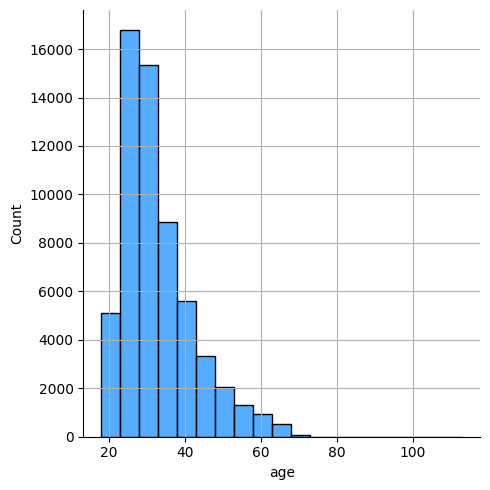

<Figure size 600x600 with 0 Axes>

In [67]:
plt.figure(figsize = (12, 6))

sns.displot(
    data=profiles, 
    x="age", 
    kind="hist", 
    binwidth = 5, 
    color = 'dodgerblue', 
    alpha = 0.75
)

plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()

Here is the same chart but broken down by gender. It seems that there are proportionally similar break down of gender by age, but slightly fewer females overall. 

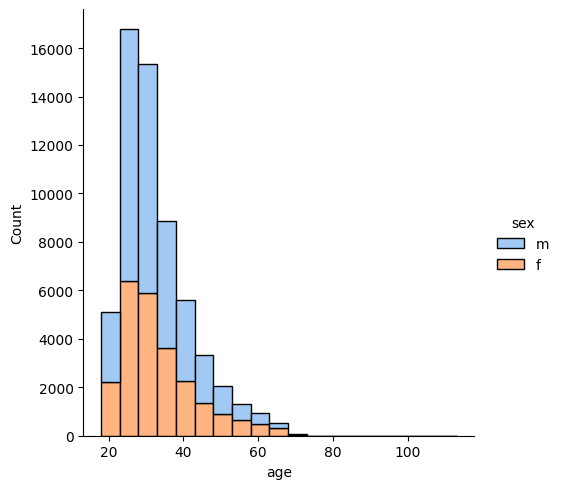

In [72]:
sns.displot(
    data=profiles, 
    x="age", 
    hue="sex", 
    kind="hist", 
    binwidth = 5, 
    multiple = "stack", 
    palette = 'pastel', 
    alpha = 1
);

#### Height

The next plot shows the height variable, most people look like they are between 5 feet tall and 6.5 feet tall.

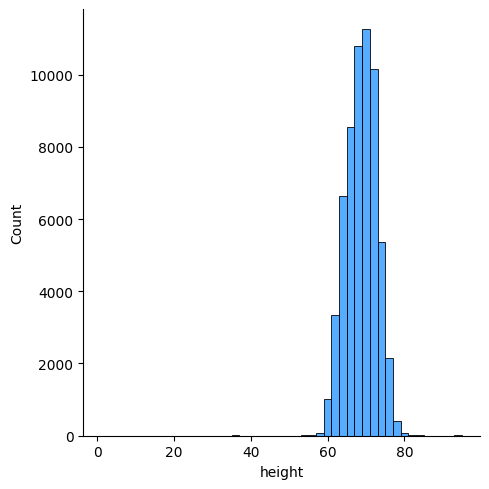

In [64]:
sns.displot(
    data=profiles, 
    x="height", 
    kind="hist", 
    binwidth = 2,
    color = 'dodgerblue', 
    alpha = 0.75
);

Here is the same height chart showing the break down by gender. It seems obvious, but females tend to be shorter than males and looks to have a normal distribution. 

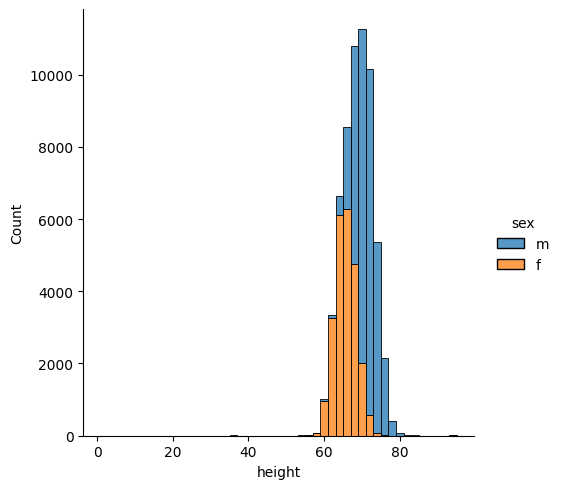

In [11]:
sns.displot(
    data=profiles, 
    x="height",
    hue="sex", 
    kind="hist", 
    binwidth = 2, 
    multiple = "stack"
);

#### Income

Here is the data of income, it seems that the majority of the participants do not include their income figures.

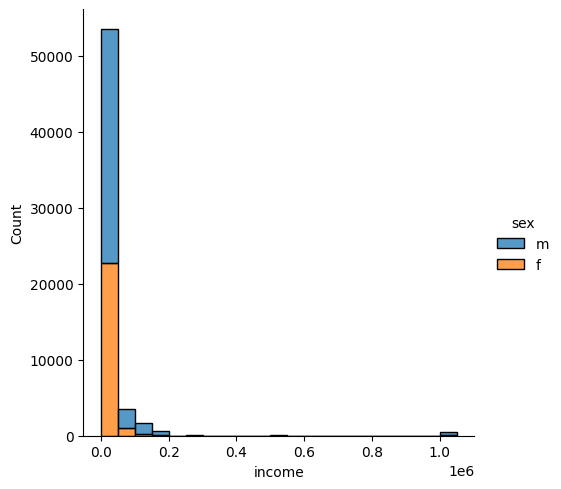

In [12]:
sns.displot(
    data=profiles, 
    x="income",
    hue="sex", 
    kind="hist", 
    binwidth = 50000, 
    multiple = "stack"
);

### Discrete Variables

#### Sex

Previously it was identified that there are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

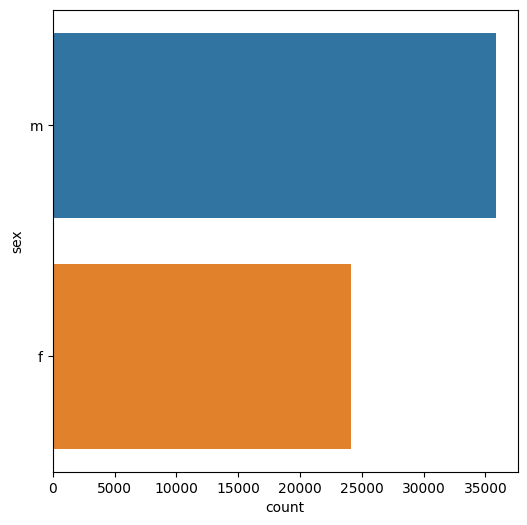

In [13]:
sns.countplot(data=profiles, y="sex");

#### Body Type

The next chart shows the body type variable, and it seems that most users will describe themselves as average, fit, or athletic.

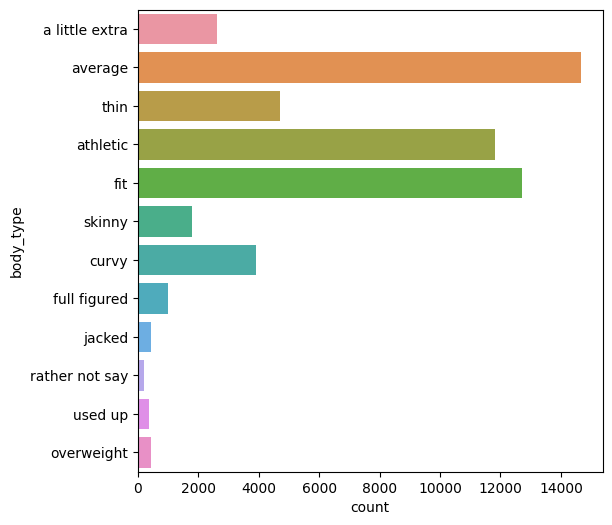

In [14]:
sns.countplot(data=profiles, y="body_type");

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

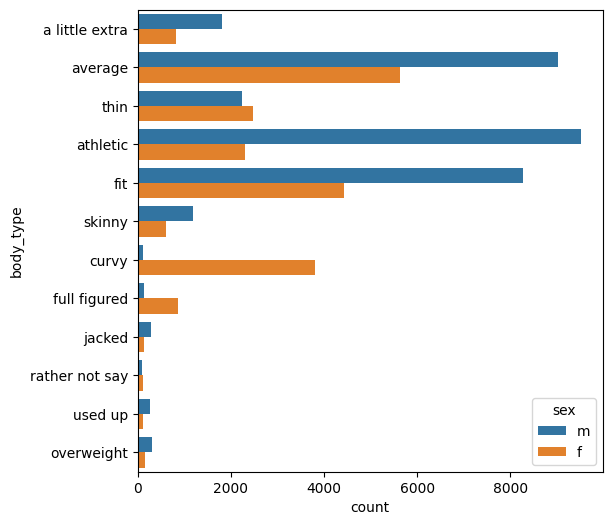

In [15]:
sns.countplot(data=profiles, y="body_type", hue = "sex");

#### Diet

Here is a chart of the dietary information for users. Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners. 

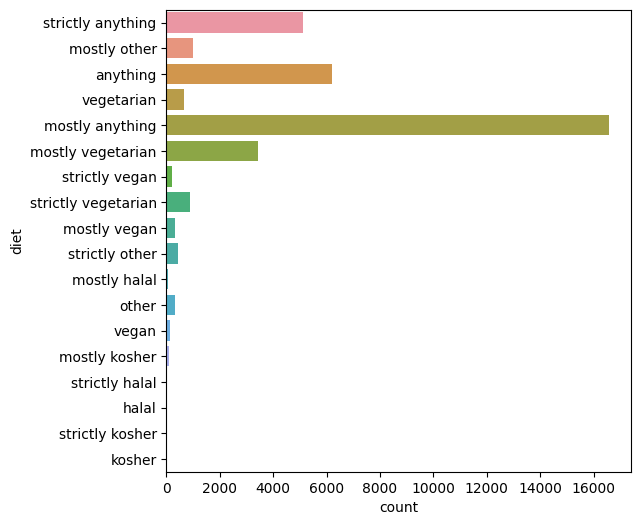

In [16]:
sns.countplot(data=profiles, y="diet");

#### Drinks

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

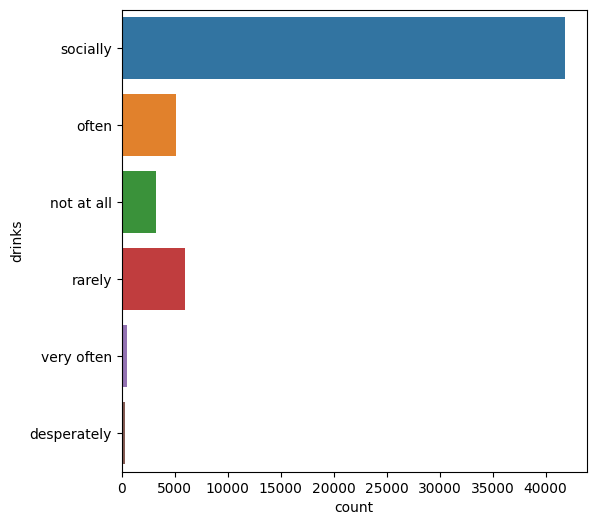

In [131]:
sns.countplot(data=profiles, y="drinks");

#### Drugs

The vast majority of users "never" use drugs. 

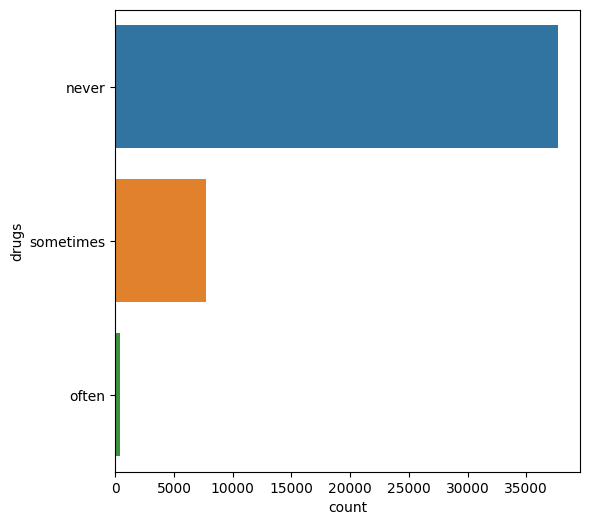

In [130]:
sns.countplot(data=profiles, y="drugs");

#### Education

Below you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

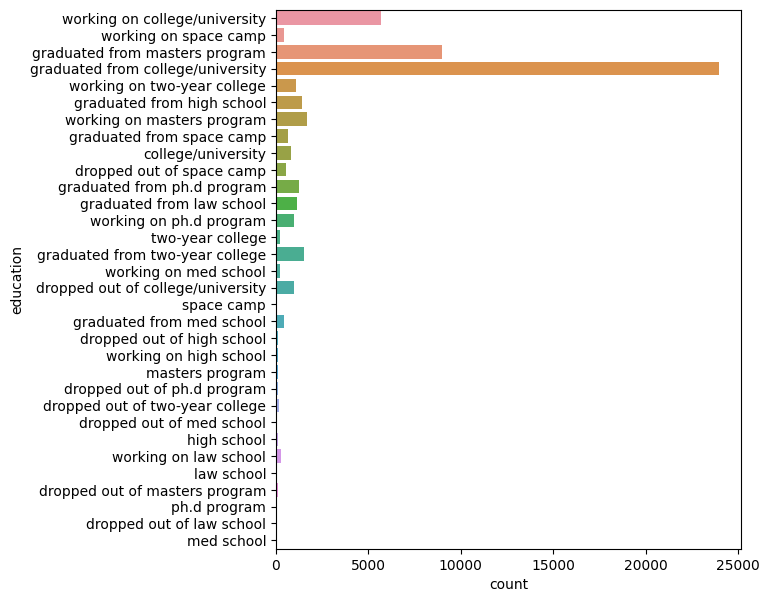

In [19]:
plt.figure(figsize=(6,7))

sns.countplot(data=profiles, y="education");

#### Jobs

Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

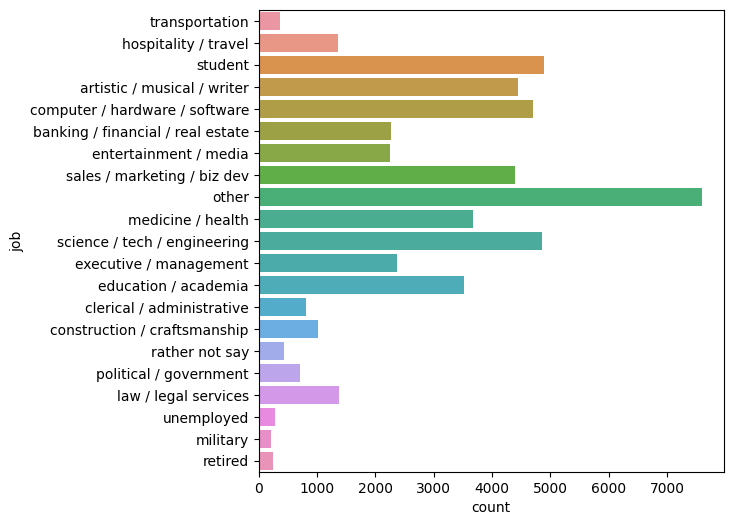

In [20]:
sns.countplot(data=profiles, y="job");

#### Offspring

The data suggest that most users do not have kids. 

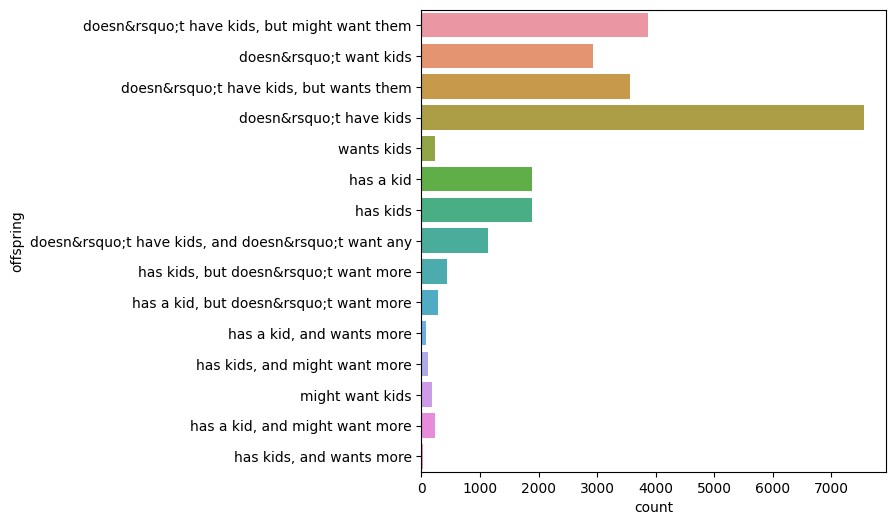

In [21]:
sns.countplot(data=profiles, y="offspring");

#### Orientation

The majority of users are straight.

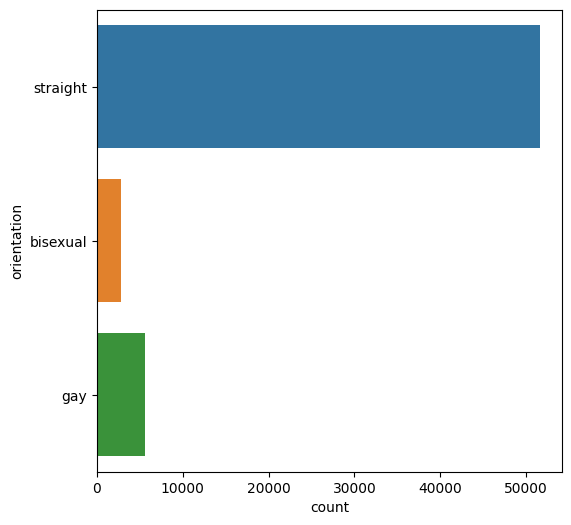

In [22]:
sns.countplot(data=profiles, y="orientation");

interestingly the majority of bisexual users re female. 

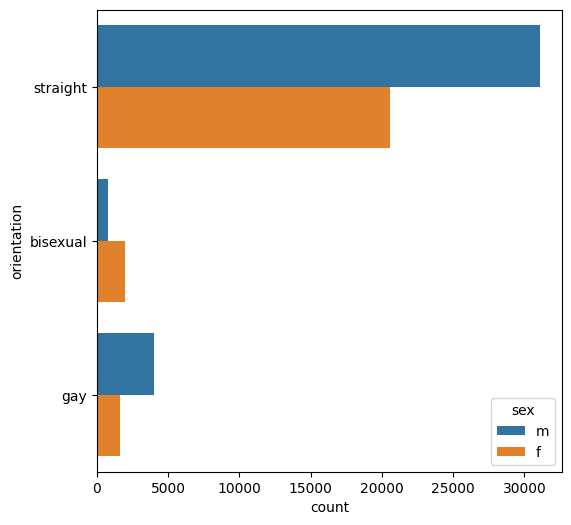

In [23]:
sns.countplot(data=profiles, y="orientation", hue = "sex");

#### Pets

The chart shows that most users like or has dogs.

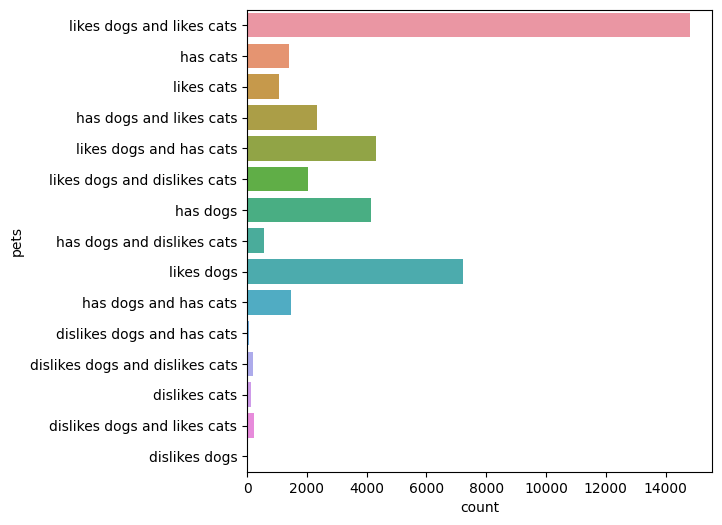

In [24]:
sns.countplot(data=profiles, y="pets");

#### Religion

Religion was similar to sign where there are a lot of qualifiers.

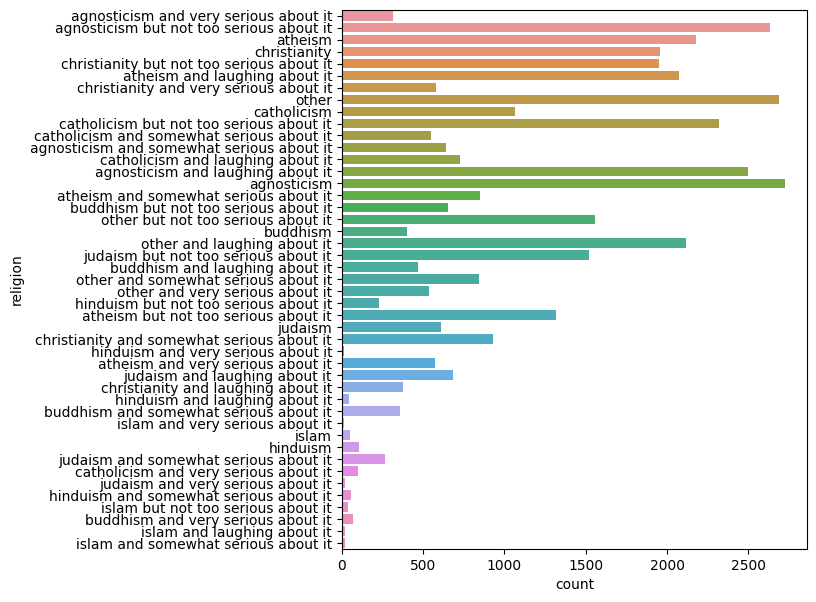

In [25]:
# set figure size
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religion");

religion was cleaned to take the first word and distilled down to 9 groups. The majority was not very religious identifying as agnostic, other, or atheists. 

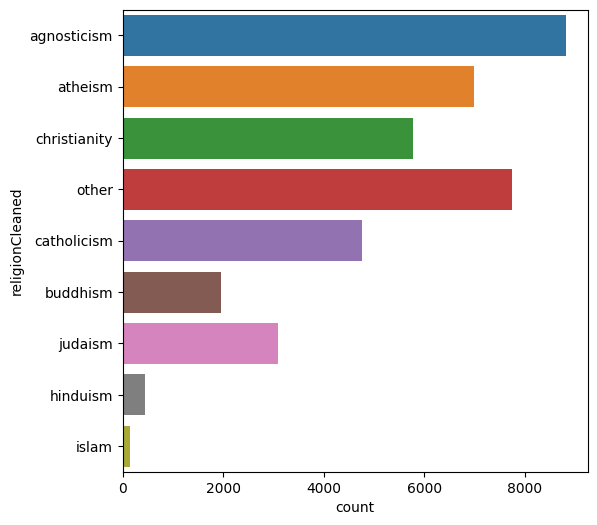

In [26]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

#### Signs

Here are the astrological signs of the users. There are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

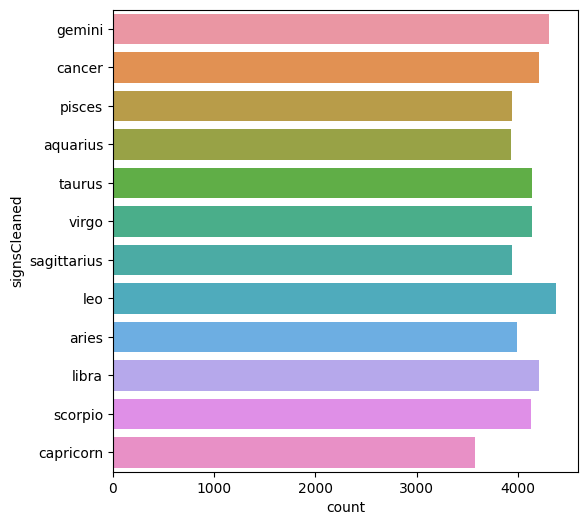

In [27]:
sns.countplot(data=profiles, y="signsCleaned");

#### Smoking

Similarly for drugs the majority of users chose "no" for smoking.

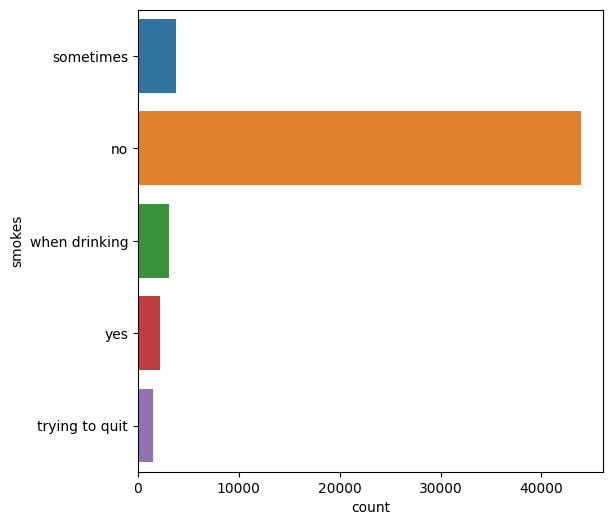

In [28]:
sns.countplot(data=profiles, y="smokes");

#### Status

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

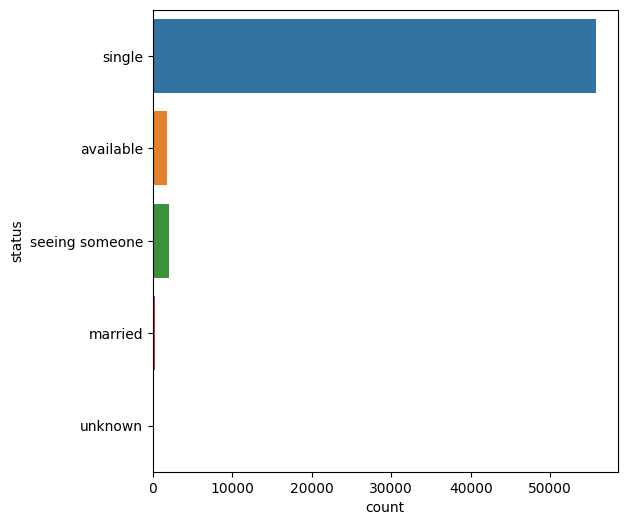

In [29]:
sns.countplot(data=profiles, y="status");

### Data Preperation


#### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [30]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signsCleaned       11056
religionCleaned    20226
dtype: int64

#### Preprocessing 

Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are inputing into our modelling step is good enough to share with others.

The data for the model is going to be a subset of the variables. The variables were selected because they might be a good predictor for astrological signs, where some of the variables that were not selected such as `age` is probably not a good indicator. 

Here na values are dropped to create a fully complete data set. 

In [31]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned', 'sex', 'job', 'signsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

#### Dummy Variables

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 columns to predict signs. 

In [32]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [33]:
df.head()

,signsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,cancer,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,taurus,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,sagittarius,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,cancer,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


#### Label Imbalance 

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions. 

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

In [34]:
df.signsCleaned.value_counts()

signsCleaned
leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: count, dtype: int64

#### Splitting Data

Next the data needs to be split into train and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for training the model. 

In [35]:
col_length = len(df.columns)

#Y is the target column, X has the rest
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

#Validation chunk size
val_size = 0.25

#Split the data into chunks
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state = 0)

#turn in to 1d arrays
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

### Prediction 

#### model building 

Now it's time to create some models, here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. For this project three common algorithms will be used to make predictions.

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

#### Logistic Regression

The first model is using logistic regression with the `multi_class="multinomial"` argument. Using `lr_model` predictions are created from the training dataset which is used to figure out how well the model preformed.


In [163]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).

In [164]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



In [165]:
from sklearn.metrics import confusion_matrix 
lr_cm = confusion_matrix(Y_train, lr_predictions)
lr_labels = lr_model.classes_

In [166]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(lr_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08508914 0.09116694 0.08265802 0.09076175 0.08471828]
Baseline: 8.69% (0.34%)


#### Decision Trees

The last model is the decision tree, the default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 78% accuracy with this model.

In [100]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [101]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [102]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

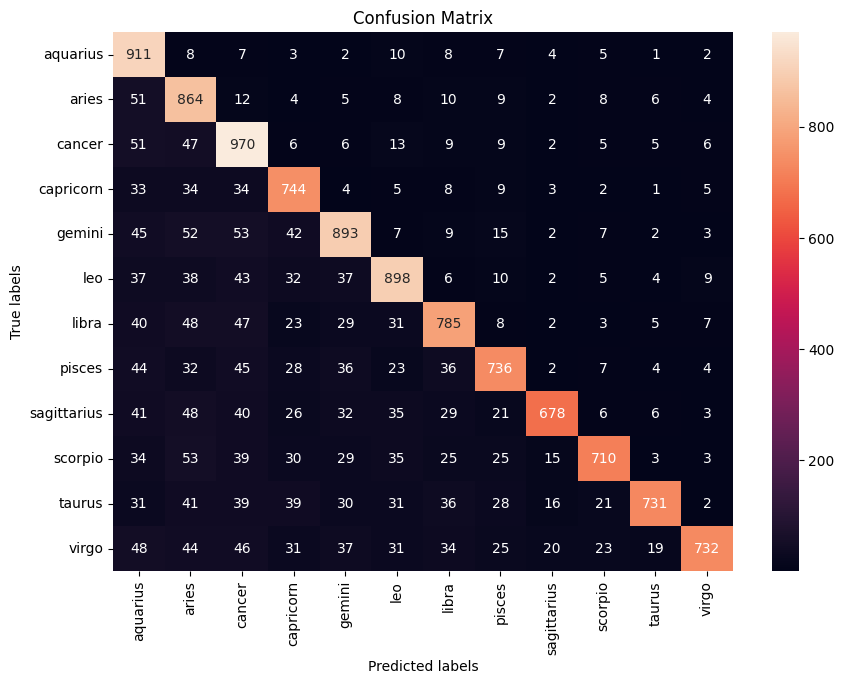

In [103]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

Going back to the model, a quick analysis will show that this tree model has a depth of 49 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data. 

In [104]:
cart_model.get_depth()

49

To make a point, a five fold cross validation is created with the same data. The results are about the Logistic Regression algorithms. the baseline was ~9%

In [105]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08306321 0.09197731 0.08833063 0.09886548 0.08512363]
Baseline: 8.95% (0.56%)


The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model. 

In [106]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [107]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.41      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.28      0.41      0.34      1028
      pisces       0.61      0.35      0.44       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.37      0.39      0.38      1001
      taurus       0.53      0.38      0.44      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.45      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



If we check again with cross validation, the new model is still averaging ~8% which is not very good. 

In [108]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.07536467 0.08670989 0.08752026 0.08184765 0.09201459]
Baseline: 8.47% (0.56%)


#### Random Forest Classifier

The next models is the `RandomForestClassifier` which will take 200 shallow decision trees to predict the signs. This number can be tuned later on if needed. This model had a 78% accuracy which is a good sign.

In [159]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 200, criterion = 'gini').fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_train)

In [160]:
print(classification_report(Y_train, rf_predictions))

              precision    recall  f1-score   support

    aquarius       0.81      0.78      0.79       968
       aries       0.77      0.78      0.77       983
      cancer       0.77      0.79      0.78      1129
   capricorn       0.79      0.78      0.78       882
      gemini       0.79      0.78      0.78      1130
         leo       0.78      0.81      0.79      1121
       libra       0.77      0.78      0.78      1028
      pisces       0.74      0.78      0.76       997
 sagittarius       0.81      0.76      0.78       965
     scorpio       0.80      0.78      0.79      1001
      taurus       0.79      0.78      0.79      1045
       virgo       0.78      0.79      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.78      0.78      0.78     12339
weighted avg       0.78      0.78      0.78     12339



In [161]:
from sklearn.metrics import confusion_matrix 
rf_cm = confusion_matrix(Y_train, rf_predictions)
rf_labels = rf_model.classes_

In [162]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(rf_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.0802269  0.08833063 0.08103728 0.08752026 0.09120389]
Baseline: 8.57% (0.43%)


#### Final Model

So it seems that the simple Logistic Regression Classifier might be the best model for OkCupid to use when users don't have their signs listed on their user profile. By using the hold out or validation set, we get ~9% accuracy which is not very good. 

In [167]:
lr_predictionsVal = lr_model.predict(X_val) 
print(classification_report(Y_val, lr_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.07      0.04      0.05       294
       aries       0.07      0.06      0.06       345
      cancer       0.09      0.21      0.13       328
   capricorn       0.14      0.04      0.07       315
      gemini       0.08      0.10      0.09       366
         leo       0.09      0.14      0.11       395
       libra       0.07      0.05      0.06       326
      pisces       0.11      0.09      0.10       337
 sagittarius       0.08      0.05      0.06       347
     scorpio       0.07      0.02      0.03       355
      taurus       0.08      0.08      0.08       345
       virgo       0.09      0.14      0.11       361

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



In the confusion matrix, it becomes clear that Cancer, Gemini, Leo, and Virgo was predicted most often, but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct. 

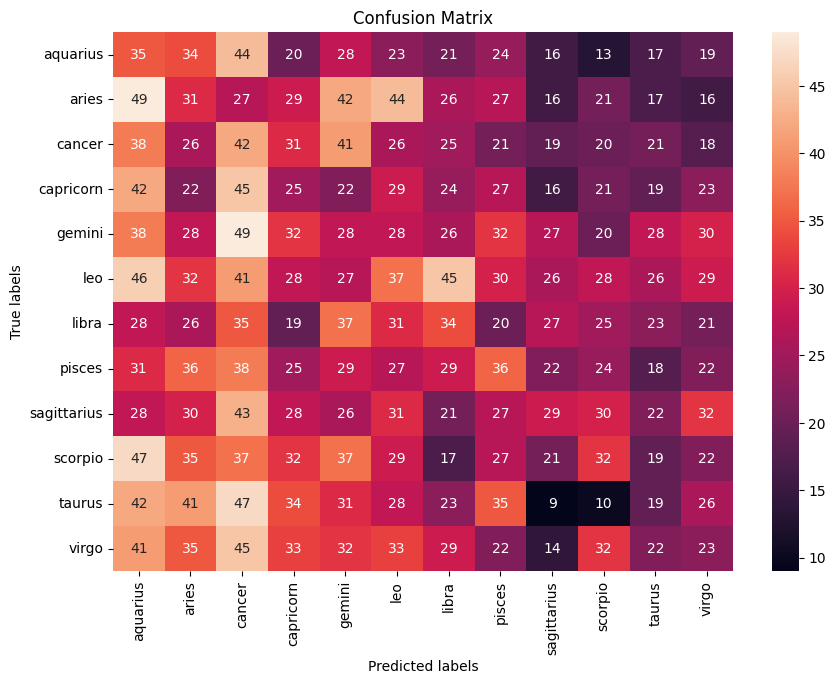

In [126]:
final_cm = confusion_matrix(Y_val, dtc_predictionsVal)
dtc_labels = dtc_model.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(dtc_labels); 
ax.yaxis.set_ticklabels(dtc_labels);

### Conclusion


#### General Comments

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.


#### Next Steps 

Next steps will be to seriously consider whether it is possible to predict user's astrological signs period, or if there is a way to do with more data. Another possibility is to add additional models or tune the hyper parameters of the used models to see if any more predictive power could be squeezed out of the algorithms. 